# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>


### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamin Villaseca
- Nombre de alumno 2: Lucas Alvarez P.

### **Link de repositorio de GitHub:** https://github.com/lucasssalvarez11/lucasssalvarez11

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.





### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. La diferencia etre los datos de entrenamiento y validación es que como su nombre indica, los datos de entrenamiento son usados para que el modelo aprenda patrones para luego este mismo pueda realizar su tarea dada, con estos el modelo ajusta sus parametros con estos datos para poder tener una mayor precision a la hora de predecir en un futuro. Luego los datos de validacion son un conjunto separados a los datos de entrenamiento que se ocupan para evaluar el modelo, permitiendo ver si es que el entrenamiento del modelo fue el adecuado.

2. La caracteristica de la data no supervisada es que esta no cuenta con la etiquetas, por lo que no se puede entrenar directamente un modelo con un set de entrenamiento, por lo que el modelo por si solo intentara segun las caracteristicas otorgadas generar grupos (pueden ser clusters) los cuales no necesariamente pueden representar un grupo que represente una categoria util a utilizar en un problema, por lo que puede derivar a resultados ambiguos o no interpretables.

3. La matriz de confusion consta de las clases reales y las clases predichas por el modelo, donde en esta matriz podemos ver cuantos datos coinciden con la prediccion y cuantos no, aqui es donde sale el concepto tambien de falsos positivos y negativos. Esta matriz se utiliza para evaluar el rendimiento de un modelo con indicadores como los son el "accuaracy" o "recall".

4. Priero es importante definir los atributos de la matriz de confusion antes mencionada:

- **TP (True Positives):** positivos bien clasificados.

- **TN (True Negatives):** negativos bien clasificados.

- **FP (False Positives):** negativos que el modelo predijo como positivos.

- **FN (False Negatives):** positivos que el modelo predijo como negativos.

Luego vamos una a una:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Esta metrica nos indica directamente el porcentaje de acierto del modelo, es decir si tenemos Accuracy = 1, implica que el modelo acerto a todas las predicciones.

$$
Precision = \frac{TP}{TP + FP}
$$

Esta metrica indica, de todas las veces que el modelo predijo algo positivo, cuantas veces lo fue realmente.

$$
Recall = \frac{TP}{TP + FN}
$$

Nos indica de todos los positivos reales, cuantos se lograron predecir correctamente.

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

En particular esta metrica lo que muestra es si es que el Precision y Recall se encuentran en equilibrio, es decir, si estos dos son altos implica un f1 score cercano a 1 y si es 0 indica que el modelo no acerto a nada util.

5. Metricas a usar en cada caso:

- Como lo que mas nos importa son las fallas reales, nos centraremos en la metrica de **Recall** ya que esta nos proporciona la cantidad de fallas reales, dejando un poco de lado los falsos positivos.

- En este caso lo mas importante es no clasificar a alguien como que esta sano cuando en verdad este enfermo, por lo que aqui directamente nos basamos en el **Recall** para no dejar casos reales sin detectar.

- Aqui la idea es minimizar el aceptar el credito a una persona que no pague al banco por lo que nos basaremos en el **Precision** para asegurarnos que las aprobaciones de creditos sean correctas.

- Finalmente en este caso lo importante es no acusar falsamente a una persona por lo que nuevamente sera importante la precision que se tenga y por ende nos fijaremos en la metrica de **Precision**.

6. La calibración de un modelo va mas alla de simplemente acertar con la prediccion, sino mas bien lo que busca es que la probabilidad de que haya hecho esa prediccion corresponda a algo mas realista. Esto principalmente ayuda con la interpretabilidad y confianza del modelo ya que asi se puede saber con certeza que el modelo esta seguro de la respuesta que da y asi sea realista y sirva efectivamente para toma de decisiones.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Colab Notebooks/Lab Programacion Cientifica /Laboratorios /Lab5/stats_players.csv'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [4]:
df = pd.read_csv(path)

In [5]:
#Agregamos el atributo "label"
df["label"] = df["National_Position"].notnull().astype(int)

In [6]:
#Conteo de 0 y 1

ceros = df["label"].value_counts()[0]
unos = df["label"].value_counts()[1]

print(f"Cantidad de ceros: {ceros}")
print(f"Cantidad de unos: {unos}")

Cantidad de ceros: 16513
Cantidad de unos: 1075


Podemos ver que tenemos 16.513 jugadores que no tienen una posicion en la caracteristica de National_position, por lo que las clasificamos como 0 y tenemos a 1.075 jugdores que si tienen una posicion en la columna antes mencionada, por lo que si se encuentrar representando a sus selecciones.

In [7]:
# Columnas categóricas
col_categoricas = ["Preffered_Foot", "Work_Rate"]

# Columnas numéricas
col_numericas = [
    "Height", "Weight", "Age", "Weak_foot", "Skill_Moves",
    "Ball_Control", "Dribbling", "Marking", "Sliding_Tackle", "Standing_Tackle",
    "Aggression", "Reactions", "Interceptions", "Vision", "Composure",
    "Crossing", "Short_Pass", "Long_Pass", "Acceleration", "Speed",
    "Stamina", "Strength", "Balance", "Agility", "Jumping", "Heading",
    "Shot_Power", "Finishing", "Long_Shots", "Curve", "Freekick_Accuracy",
    "Penalties", "Volleys"
]


col_transformer = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), col_numericas),
        ("cat", OneHotEncoder(handle_unknown="ignore"), col_categoricas)
    ],
    remainder="drop"
)


Como podemos notar solo tenemos datos que vienen dados por variables categoricas y numericas, donde las que son categoricas como el caso de de pie preferido es facil aplicarle un one hot encoder ya que en especifico tenemos una variable bnaria en si, es decir si es que prefiere el derecho o el izquierdo, mientras que para Work rate, pasa un poco lo mismo pero con un poco mas de posibilidades por lo cual no seria malo aplicarle one hot encoder a cada una de las posibilidades. Pero con el resto de variables categoricas referentes a la nacaionalidad o posicion, esto no es muy util transformarlo ya que no nos entragara mucha mas informacion relevante.

Luego pasando a los numericos, si bien se puede ver ligereramente que algunas de las varibales distribuyen normalmente (Players stats report) preferimos no asumir esto y asi simplificar empleando la transformacion de MinMaxScaler.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [8]:
X = df.drop("label", axis=1)
y = df["label"]

# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=69,stratify=y)

In [9]:
pipeline_xgboost = Pipeline(steps=[
    ("preprocess", col_transformer),
    ("clf", XGBClassifier(
        n_estimators=400, learning_rate=0.05, max_depth=6,
        subsample=0.9, colsample_bytree=0.9,
        objective="binary:logistic", eval_metric="logloss",
        random_state=42, n_jobs=-1
    ))
])

In [10]:
pipeline_lightgbm = Pipeline(steps=[
    ("preprocess", col_transformer),
    ("clf", LGBMClassifier(
        n_estimators=400, learning_rate=0.05, max_depth=-1,
        num_leaves=31, subsample=0.9, colsample_bytree=0.9,
        objective="binary", random_state=42, n_jobs=-1
    ))
])

Entrenamiento de los pipelines

In [11]:
# Columnas a excluir de los features
cols_excluir = ["label", "National_Position", "Name", "Nationality", "Club_Position"]

X = df.drop(columns=[c for c in cols_excluir if c in df.columns])
y = df["label"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2467
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Preffered_Foot',
                                                   'Work_Rate'])])),
                ('clf',
                 LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05,
                                n_estimators=400, n_jobs=-1, objective='binary',
                                random_state=42, subsample=0.9))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [15]:
# Predecir
y_pred_xgb = pipeline_xgboost.predict(X_test)
y_pred_lgb = pipeline_lightgbm.predict(X_test)

# Métricas clase positiva
for name, y_pred in [("XGB", y_pred_xgb), ("LGBM", y_pred_lgb)]:
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec  = recall_score(y_test, y_pred, pos_label=1)
    print(f"\n{name} -> Acc: {acc:.4f}  Prec: {prec:.4f}  Rec: {rec:.4f}")
    print(classification_report(y_test, y_pred))


XGB -> Acc: 0.9414  Prec: 0.6047  Rec: 0.1209
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.60      0.12      0.20       215

    accuracy                           0.94      3518
   macro avg       0.78      0.56      0.59      3518
weighted avg       0.92      0.94      0.92      3518


LGBM -> Acc: 0.9406  Prec: 0.5714  Rec: 0.1116
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.57      0.11      0.19       215

    accuracy                           0.94      3518
   macro avg       0.76      0.55      0.58      3518
weighted avg       0.92      0.94      0.92      3518



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Aunque los dos modelos muestran un accuracy cercano al 94%, este resultado está fuertemente influido por el desbalance de clases, ya que la mayoría de los jugadores no son seleccionados. Lo que realmente importa es cómo se desempeñan con la clase positiva: la precisión es cercana al 60%, es decir, cuando el modelo predice que un jugador será seleccionado suele acertar más de la mitad de las veces, pero el recall es muy bajo (alrededor del 12%), lo que significa que deja fuera a la gran mayoría de los seleccionados reales. En este contexto, la métrica más importante es el recall, porque lo relevante es no perder jugadores que deberían ser convocados. Y aunque ambos modelos tienen este mismo problema, el XGB rinde un poco mejor que el LGBM, por lo que se puede considerar la opción más adecuada.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [16]:
df = pd.read_csv(path)

In [17]:
import re


ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

# 2) Crea un mapa posición para luego poner el label
pos_to_label = {}
pos_to_label.update({p: "ataque" for p in ataque})
pos_to_label.update({p: "central_ataque" for p in central_ataque})
pos_to_label.update({p: "central" for p in central})
pos_to_label.update({p: "central_defensa" for p in central_defensa})
pos_to_label.update({p: "defensa" for p in defensa})
pos_to_label.update({p: "arquero" for p in arquero})

#funcion para hacer el label
def map_position_to_label(val):
    if pd.isna(val):
        return pd.NA
    s = str(val).upper()
    # Excluir SUB y RES
    if "SUB" in s or "RES" in s:
        return pd.NA
    tokens = re.split(r'[\/\-\|,\s]+', s)
    for t in tokens:
        if t in pos_to_label:
            return pos_to_label[t]
    return pd.NA

# 4) Crear nueva columna
df["label"] = df["Club_Position"].apply(map_position_to_label)

In [18]:
# Conteo de cada clase
conteo = df["label"].value_counts(dropna=False)
print(conteo)

label
<NA>               13649
defensa             1180
central              907
arquero              632
central_ataque       581
ataque               430
central_defensa      209
Name: count, dtype: int64


Dado el link que se menciona se ya que tenemos mas de 50 samples, predecimos una variable categorica, con etiqueta con menos de 100k samples, deberiamos ocupar Linear svc. Por lo que hagamos el pipeline:

In [19]:
col_categoricas = ["Preffered_Foot", "Work_Rate"]

col_numericas = [
    "Height", "Weight", "Age", "Weak_foot", "Skill_Moves",
    "Ball_Control", "Dribbling", "Marking", "Sliding_Tackle", "Standing_Tackle",
    "Aggression", "Reactions", "Interceptions", "Vision", "Composure",
    "Crossing", "Short_Pass", "Long_Pass", "Acceleration", "Speed",
    "Stamina", "Strength", "Balance", "Agility", "Jumping", "Heading",
    "Shot_Power", "Finishing", "Long_Shots", "Curve", "Freekick_Accuracy",
    "Penalties", "Volleys"
]

cols_excluir = ["label", "National_Position", "Name", "Nationality", "Club_Position"]

df_ = df.copy()
df_ = df_.dropna(subset=["label"]).copy()

X = df_.drop(columns=[c for c in cols_excluir if c in df_.columns], errors="ignore")
y = df_["label"]

col_numericas_presentes = [c for c in col_numericas if c in X.columns]
col_categoricas_presentes = [c for c in col_categoricas if c in X.columns]

col_transformer = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", MinMaxScaler())
        ]), col_numericas_presentes),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), col_categoricas_presentes)
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=69)


svc = LinearSVC(C=1.0, class_weight="balanced", max_iter=5000, random_state=69)

pipe = Pipeline([
    ("prep", col_transformer),
    ("clf", svc),
])

#Entrenamiento y evaluacion
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy en TEST:", round(accuracy_score(y_test, y_pred), 4))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy en TEST: 0.7246

Reporte de Clasificación:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.68      0.92      0.78        86
        central       0.67      0.40      0.50       182
 central_ataque       0.47      0.49      0.48       116
central_defensa       0.31      0.38      0.34        42
        defensa       0.83      0.93      0.88       236

       accuracy                           0.72       788
      macro avg       0.66      0.69      0.66       788
   weighted avg       0.72      0.72      0.71       788



El modelo con LinearSVC alcanza un 72% de accuracy, distinguiendo muy bien a arqueros y defensas, mientras que en ataque logra alto recall pero menor precisión, ya que suele confundir jugadores de otras posiciones como delanteros. En cambio, en las posiciones intermedias (central, central_ataque y central_defensa) el desempeño es bajo, reflejando tanto el desbalance de datos como la similitud de atributos entre estas clases. En general, el modelo funciona sólido para roles bien definidos, pero requiere mejoras para diferenciar mejor las zonas mixtas del campo.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [ ]:
!pip install pycaret --quiet

In [ ]:
!pip -q install pycaret==3.* xgboost lightgbm catboost


In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.10 python3.10-dev python3.10-venv python3.10-distutils -y

!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.12 2
!sudo update-alternatives --config python3


In [ ]:
!wget https://bootstrap.pypa.io/get-pip.py
!python3 get-pip.py


In [18]:
!pip install pycaret==3.* xgboost lightgbm catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11

Modelos de clasificación: DT, RF y ET

- **DT (Decision Tree):**  
  Modelo que divide los datos con reglas tipo *“¿X > umbral?”*, formando ramas y hojas.  
  Es fácil de interpretar, pero puede sobreajustar si no se regula.

- **RF (Random Forest):**  
  Conjunto de muchos árboles de decisión entrenados con datos y variables aleatorios.  
  Predice por **votación** en clasificación o **promedio** en regresión.  
  Es más robusto y preciso que un solo árbol.

- **ET (Extra Trees ):**  
  Similar a Random Forest, pero las divisiones se eligen de forma más aleatoria.  
  Esto acelera el entrenamiento y puede mejorar la generalización,  
  aunque se sacrifica algo de interpretabilidad.


### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

Accuracy inicial: 0.9397

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.53      0.13      0.21       215

    accuracy                           0.94      3518
   macro avg       0.74      0.56      0.59      3518
weighted avg       0.92      0.94      0.92      3518


Matriz de Confusión:
 [[3278   25]
 [ 187   28]]

Top 10 características:
                        feature  importance
11              num__Reactions    0.109661
35  cat__Work_Rate_High / High    0.038501
9         num__Standing_Tackle    0.029524
34   cat__Preffered_Foot_Right    0.028519
2                     num__Age    0.028126
14              num__Composure    0.027047
16             num__Short_Pass    0.024753
20                num__Stamina    0.024109
7                 num__Marking    0.023603
5            num__Ball_Control    0.023128


<Figure size 800x600 with 0 Axes>

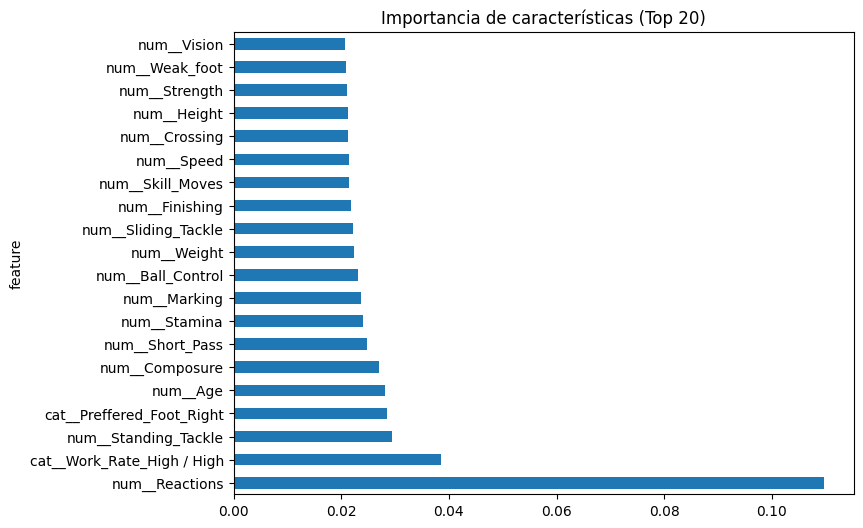

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV
import xgboost as xgb
import matplotlib.pyplot as plt


# Etiqueta: 1 si el jugador tiene National_Position, 0 si no
df["label"] = df["National_Position"].notnull().astype(int)


col_categoricas = ["Preffered_Foot", "Work_Rate"]

col_numericas = [
    "Height", "Weight", "Age", "Weak_foot", "Skill_Moves",
    "Ball_Control", "Dribbling", "Marking", "Sliding_Tackle", "Standing_Tackle",
    "Aggression", "Reactions", "Interceptions", "Vision", "Composure",
    "Crossing", "Short_Pass", "Long_Pass", "Acceleration", "Speed",
    "Stamina", "Strength", "Balance", "Agility", "Jumping", "Heading",
    "Shot_Power", "Finishing", "Long_Shots", "Curve", "Freekick_Accuracy",
    "Penalties", "Volleys"
]

cols_excluir = ["label", "National_Position", "Name", "Nationality", "Club_Position"]


df1 = df.copy()
df1 = df1.dropna(subset=["label"]).copy()

X = df1.drop(columns=[c for c in cols_excluir if c in df1.columns], errors="ignore")
y = df1["label"]

col_numericas_presentes = [c for c in col_numericas if c in X.columns]
col_categoricas_presentes = [c for c in col_categoricas if c in X.columns]

col_transformer = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", MinMaxScaler())
        ]), col_numericas_presentes),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), col_categoricas_presentes)
    ],
    remainder="drop"
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss"
)

pipe = Pipeline([
    ("prep", col_transformer),
    ("clf", xgb_model)
])

# Entrenar con todas las features
pipe.fit(X_train, y_train)

# Evaluación inicial
y_pred = pipe.predict(X_test)
print("Accuracy inicial:", round(accuracy_score(y_test, y_pred), 4))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Ver la importancia de los features

feature_names = pipe.named_steps["prep"].get_feature_names_out()
importances = pipe.named_steps["clf"].feature_importances_

feature_importances = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("\nTop 10 características:\n", feature_importances.head(10))

plt.figure(figsize=(8,6))
feature_importances.head(20).plot(
    x="feature", y="importance", kind="barh", legend=False, figsize=(8,6))
plt.title("Importancia de características (Top 20)")
plt.show()


rfe = RFECV(
    estimator=xgb.XGBClassifier(
        random_state=42,
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="mlogloss"
    ),
    step=1,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

In [22]:
X_train_trans = pipe.named_steps["prep"].transform(X_train)

rfe.fit(X_train_trans, y_train)

print("\nNúmero óptimo de características:", rfe.n_features_)
selected_features_idx = rfe.support_
selected_features = feature_names[selected_features_idx]
print("Características seleccionadas:\n", selected_features.tolist())

#nuevo modelo con la reduccion
X_train_reduced = X_train_trans[:, selected_features_idx]
X_test_reduced = pipe.named_steps["prep"].transform(X_test)[:, selected_features_idx]

xgb_reduced = xgb.XGBClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss"
)

xgb_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = xgb_reduced.predict(X_test_reduced)

print("\nAccuracy con features reducidas:", round(accuracy_score(y_test, y_pred_reduced), 4))
print("\nReporte con features reducidas:\n", classification_report(y_test, y_pred_reduced))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_reduced))


Número óptimo de características: 30
Características seleccionadas:
 ['num__Height', 'num__Weight', 'num__Age', 'num__Skill_Moves', 'num__Ball_Control', 'num__Dribbling', 'num__Marking', 'num__Sliding_Tackle', 'num__Standing_Tackle', 'num__Aggression', 'num__Reactions', 'num__Interceptions', 'num__Vision', 'num__Composure', 'num__Crossing', 'num__Short_Pass', 'num__Acceleration', 'num__Speed', 'num__Stamina', 'num__Strength', 'num__Balance', 'num__Agility', 'num__Heading', 'num__Shot_Power', 'num__Finishing', 'num__Long_Shots', 'num__Freekick_Accuracy', 'num__Penalties', 'num__Volleys', 'cat__Work_Rate_High / High']

Accuracy con features reducidas: 0.9417

Reporte con features reducidas:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.60      0.13      0.22       215

    accuracy                           0.94      3518
   macro avg       0.78      0.56      0.60      3518
weighted avg       0.93     

El rendimiento del modelo reducido es muy similar al del modelo original, ya que ambos alcanzan alrededor de un 94% de accuracy, con un desempeño prácticamente idéntico en la clase mayoritaria y una leve mejora en precisión y f1-score de la clase minoritaria. Esto indica que el modelo reducido mantiene la robustez y la capacidad predictiva del modelo completo.
Entre los beneficios de eliminar variables se encuentran la simplificación del modelo, lo que facilita su implementación, la reducción del tiempo de entrenamiento y predicción al trabajar con menos datos, y una posible mejora en la generalización, al disminuir el riesgo de sobreajuste en variables poco informativas.
Además, un modelo con menor dimensionalidad es más sencillo de explicar, ya que se centra en un conjunto más reducido de características clave, lo que hace más clara la interpretación de los features que influyen en la predicción. La eliminación de variables irrelevantes o redundantes facilita comunicar los resultados y entender el comportamiento del modelo.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [23]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss

#Antes de calibrar
y_proba_before = xgb_reduced.predict_proba(X_test_reduced)[:, 1]
brier_before = brier_score_loss(y_test, y_proba_before)
print("Brier Score antes de calibración:", round(brier_before, 4))


calibrated = CalibratedClassifierCV(estimator=xgb_reduced, method="isotonic", cv=3)
calibrated.fit(X_train_reduced, y_train)

#post calibrar
y_proba_after = calibrated.predict_proba(X_test_reduced)[:, 1]
brier_after = brier_score_loss(y_test, y_proba_after)
print("Brier Score después de calibración:", round(brier_after, 4))


prob_true_before, prob_pred_before = calibration_curve(y_test, y_proba_before, n_bins=10)
prob_true_after, prob_pred_after = calibration_curve(y_test, y_proba_after, n_bins=10)

Brier Score antes de calibración: 0.049
Brier Score después de calibración: 0.0488


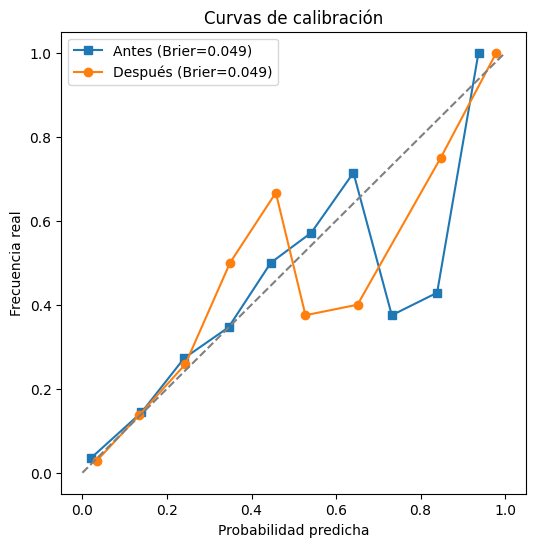

In [24]:
plt.figure(figsize=(6,6))
plt.plot(prob_pred_before, prob_true_before, "s-", label=f"Antes (Brier={brier_before:.3f})")
plt.plot(prob_pred_after, prob_true_after, "o-", label=f"Después (Brier={brier_after:.3f})")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Frecuencia real")
plt.title("Curvas de calibración")
plt.legend()
plt.show()


Después de calibrar el modelo vimos una mejora muy pequeña, pero positiva: el Brier Score bajó de 0.049 a 0.0488. En la curva de calibración, las probabilidades ya estaban bastante cerca de lo ideal, aunque con algunas variaciones en los valores intermedios. Tras la calibración, la línea se acerca un poco más a lo esperado. En simple, el modelo ya era bastante bueno desde el inicio, pero con la calibración sus predicciones se vuelven un poco más confiables cuando queremos interpretar probabilidades.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>